# Multi-Company Stock Analysis

## Setup

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

%matplotlib inline


## Tickers

In [2]:
tickers = ["AAPL", "MSFT", "AMZN", "GOOGL", "TSLA"]
tickers


['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA']

## Download

In [3]:
data = yf.download(
    tickers=tickers,
    period="5y",
    interval="1d",
    auto_adjust=True,
    progress=False
)

data.head()


Price            Close                                                       High                                     \
Ticker            AAPL        AMZN      GOOGL        MSFT        TSLA        AAPL        AMZN      GOOGL        MSFT   
Date                                                                                                                   
2020-12-28  133.061218  164.197998  88.032845  215.858032  221.229996  133.693956  165.199997  88.679956  216.884732   
2020-12-29  131.289490  166.100006  87.228928  215.080826  221.996674  135.105420  167.532501  88.752912  217.988230   
2020-12-30  130.170074  164.292496  86.161484  212.710785  231.593338  132.379816  167.104996  87.725169  216.500979   
2020-12-31  129.167374  162.846497  86.974838  213.420822  235.223328  131.162954  164.145996  87.216012  213.977357   
2021-01-04  125.974457  159.331497  85.659286  208.882248  243.256668  130.062953  163.600006  87.463646  213.977403   

Price                          Low                                                       Open                         \
Ticker            TSLA        AAPL        AMZN      GOOGL        MSFT        TSLA        AAPL        AMZN      GOOGL   
Date                                                                                                                   
2020-12-28  227.133331  129.965632  158.634506  86.437901  213.996523  220.266663  130.432900  159.699997  86.591238   
2020-12-29  223.300003  130.773561  164.061005  87.097422  214.533896  218.333328  134.385075  165.496994  88.691381   
2020-12-30  232.199997  129.858563  164.123505  85.752079  212.509290  222.786667  131.980697  167.050003  87.588204   
2020-12-31  239.573334  128.223124  162.059998  86.153537  210.791678  230.373337  130.520472  163.750000  86.212100   
2021-01-04  248.163330  123.394807  157.201004  84.716906  206.118768  239.063339  129.975346  163.500000  87.340084   

Price                                  Volume                                            
Ticker            MSFT        TSLA       AAPL       AMZN     GOOGL      MSFT       TSLA  
Date                                                                                     
2020-12-28  215.368658  224.836670  124486200  113736000  27650000  17933500   96835800  
2020-12-29  217.153435  220.333328  121047300   97458000  19726000  17403200   68732400  
2020-12-30  216.117154  224.000000   96452100   64186000  21026000  20272300  128538000  
2020-12-31  212.729952  233.330002   99116600   59144000  21070000  20942100  148949700  
2021-01-04  213.526418  239.820007  143301900   88228000  37324000  37130100  145914600

## Shape

In [4]:
data.shape

(1255, 25)

## Columns

In [5]:
data.columns

MultiIndex([( 'Close',  'AAPL'),
            ( 'Close',  'AMZN'),
            ( 'Close', 'GOOGL'),
            ( 'Close',  'MSFT'),
            ( 'Close',  'TSLA'),
            (  'High',  'AAPL'),
            (  'High',  'AMZN'),
            (  'High', 'GOOGL'),
            (  'High',  'MSFT'),
            (  'High',  'TSLA'),
            (   'Low',  'AAPL'),
            (   'Low',  'AMZN'),
            (   'Low', 'GOOGL'),
            (   'Low',  'MSFT'),
            (   'Low',  'TSLA'),
            (  'Open',  'AAPL'),
            (  'Open',  'AMZN'),
            (  'Open', 'GOOGL'),
            (  'Open',  'MSFT'),
            (  'Open',  'TSLA'),
            ('Volume',  'AAPL'),
            ('Volume',  'AMZN'),
            ('Volume', 'GOOGL'),
            ('Volume',  'MSFT'),
            ('Volume',  'TSLA')],
           names=['Price', 'Ticker'])

## Prices

In [6]:
adj_close = data["Close"].copy()
adj_close.head()


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2020-12-28,133.061218,164.197998,88.032845,215.858032,221.229996
2020-12-29,131.289490,166.100006,87.228928,215.080826,221.996674
2020-12-30,130.170074,164.292496,86.161484,212.710785,231.593338
2020-12-31,129.167374,162.846497,86.974838,213.420822,235.223328
2021-01-04,125.974457,159.331497,85.659286,208.882248,243.256668


## Inspect Prices

In [7]:
adj_close.tail()


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2025-12-18,272.190002,226.759995,302.459991,483.980011,483.369995
2025-12-19,273.670013,227.350006,307.160004,485.920013,481.200012
2025-12-22,270.970001,228.429993,309.779999,484.920013,488.730011
2025-12-23,272.359985,232.139999,314.350006,486.850006,485.559998
2025-12-24,273.809998,232.380005,314.089996,488.019989,485.399994


In [8]:
adj_close.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2020-12-28 to 2025-12-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1255 non-null   float64
 1   AMZN    1255 non-null   float64
 2   GOOGL   1255 non-null   float64
 3   MSFT    1255 non-null   float64
 4   TSLA    1255 non-null   float64
dtypes: float64(5)
memory usage: 58.8 KB


In [9]:
adj_close.describe()


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000
mean,179.088339,163.187932,144.925599,341.856282,264.823453
std,39.835519,40.159274,44.897337,89.303750,76.404227
min,113.440170,81.820000,82.804344,203.662308,108.099998
25%,146.009521,132.025002,113.720509,262.606232,210.695000
50%,171.591324,165.362000,136.369629,323.801636,248.479996
75%,209.648605,186.989998,165.068726,413.831421,308.606659
max,286.190002,254.000000,323.228577,541.057373,489.880005


In [10]:
adj_close.isna().sum()


Ticker
AAPL     0
AMZN     0
GOOGL    0
MSFT     0
TSLA     0
dtype: int64

## Daily Returns

In [11]:
returns = adj_close.pct_change()
returns.head()


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2020-12-28,NaN,NaN,NaN,NaN,NaN
2020-12-29,-0.013315,0.011584,-0.009132,-0.003601,0.003466
2020-12-30,-0.008526,-0.010882,-0.012237,-0.011019,0.043229
2020-12-31,-0.007703,-0.008801,0.009440,0.003338,0.015674
2021-01-04,-0.024719,-0.021585,-0.015126,-0.021266,0.034152


In [12]:
returns = returns.dropna()
returns.head()


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2020-12-29,-0.013315,0.011584,-0.009132,-0.003601,0.003466
2020-12-30,-0.008526,-0.010882,-0.012237,-0.011019,0.043229
2020-12-31,-0.007703,-0.008801,0.009440,0.003338,0.015674
2021-01-04,-0.024719,-0.021585,-0.015126,-0.021266,0.034152
2021-01-05,0.012364,0.010004,0.008064,0.000965,0.007317


## Inspect Returns

In [13]:
returns.describe().T


,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,1254.0,0.000729,0.017574,-0.092456,-0.008089,0.001072,0.009843,0.153288
AMZN,1254.0,0.000521,0.022128,-0.140494,-0.011242,0.000423,0.012539,0.135359
GOOGL,1254.0,0.001207,0.019632,-0.095094,-0.009521,0.001582,0.011517,0.102244
MSFT,1254.0,0.000782,0.016213,-0.077156,-0.007616,0.000816,0.009951,0.101337
TSLA,1254.0,0.001354,0.038272,-0.154262,-0.020059,0.001454,0.021724,0.226900


In [14]:
returns.isna().sum()


Ticker
AAPL     0
AMZN     0
GOOGL    0
MSFT     0
TSLA     0
dtype: int64

## Return Distributions

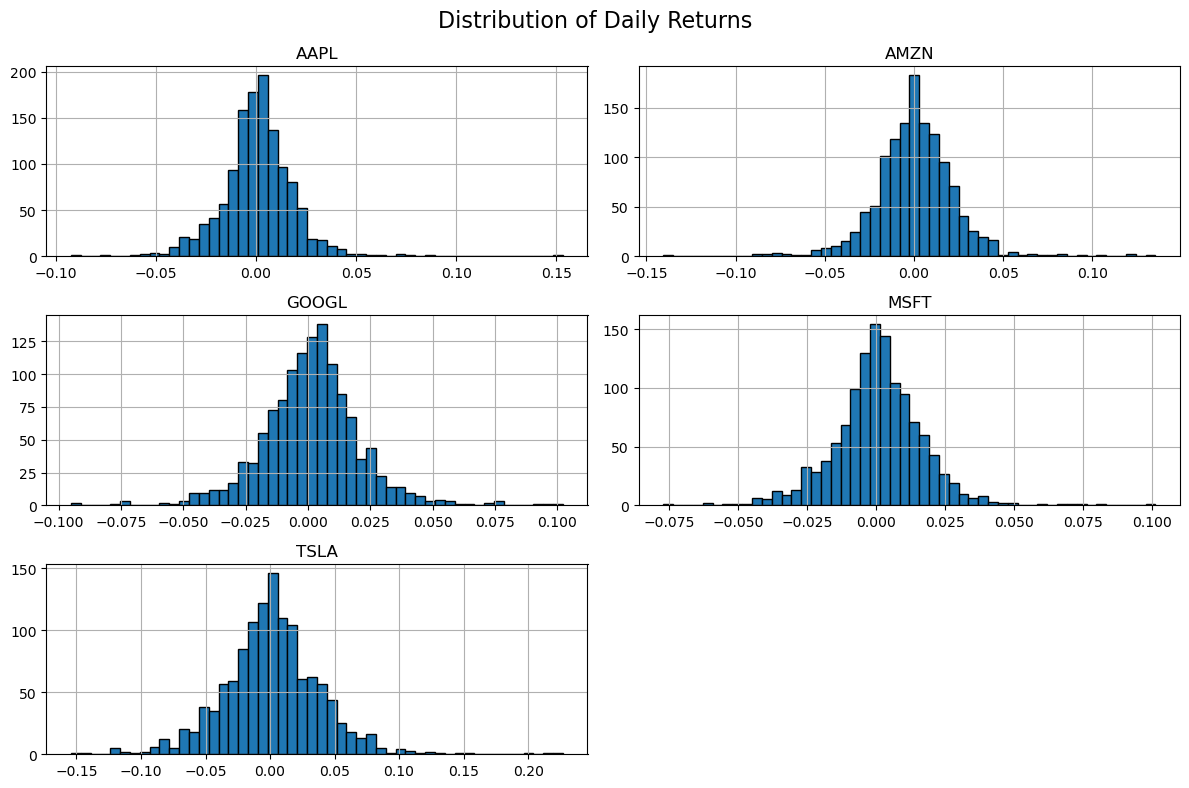

In [15]:
returns.hist(figsize=(12, 8), bins=50, edgecolor='black')
plt.suptitle("Distribution of Daily Returns", fontsize=16)
plt.tight_layout()
plt.show()


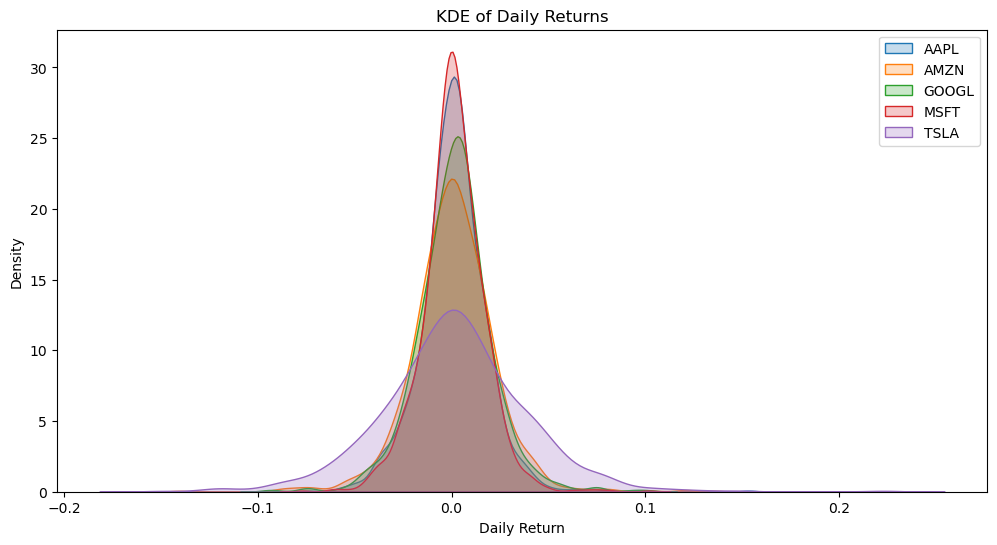

In [16]:
plt.figure(figsize=(12, 6))
for ticker in returns.columns:
    sns.kdeplot(returns[ticker], label=ticker, fill=True, alpha=0.25)

plt.title("KDE of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.legend()
plt.show()


## Rolling Metrics

In [17]:
ma20 = adj_close.rolling(window=20).mean()
ma20.head()


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2020-12-28,NaN,NaN,NaN,NaN,NaN
2020-12-29,NaN,NaN,NaN,NaN,NaN
2020-12-30,NaN,NaN,NaN,NaN,NaN
2020-12-31,NaN,NaN,NaN,NaN,NaN
2021-01-04,NaN,NaN,NaN,NaN,NaN


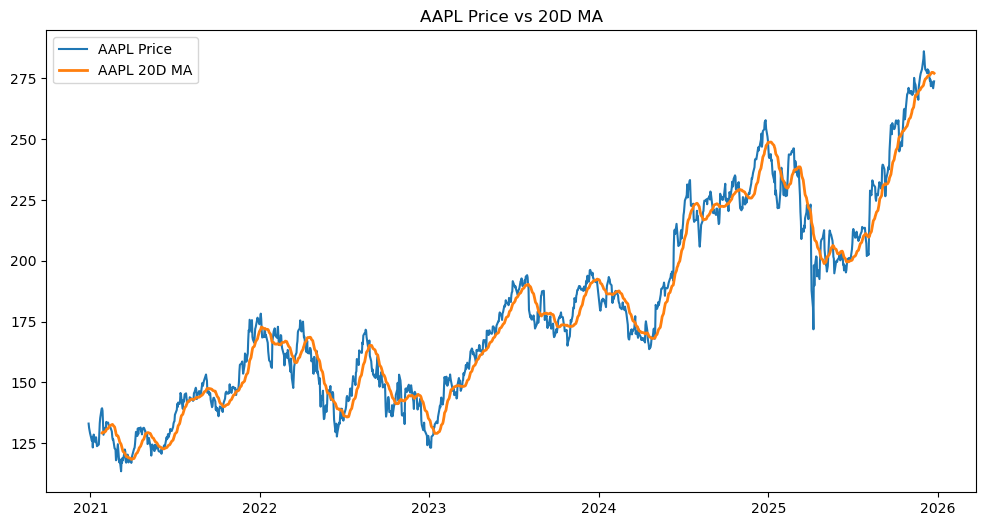

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(adj_close["AAPL"], label="AAPL Price")
plt.plot(ma20["AAPL"], label="AAPL 20D MA", linewidth=2)
plt.title("AAPL Price vs 20D MA")
plt.legend()
plt.show()


In [19]:
vol20 = returns.rolling(window=20).std()
vol20.head()


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2020-12-29,NaN,NaN,NaN,NaN,NaN
2020-12-30,NaN,NaN,NaN,NaN,NaN
2020-12-31,NaN,NaN,NaN,NaN,NaN
2021-01-04,NaN,NaN,NaN,NaN,NaN
2021-01-05,NaN,NaN,NaN,NaN,NaN


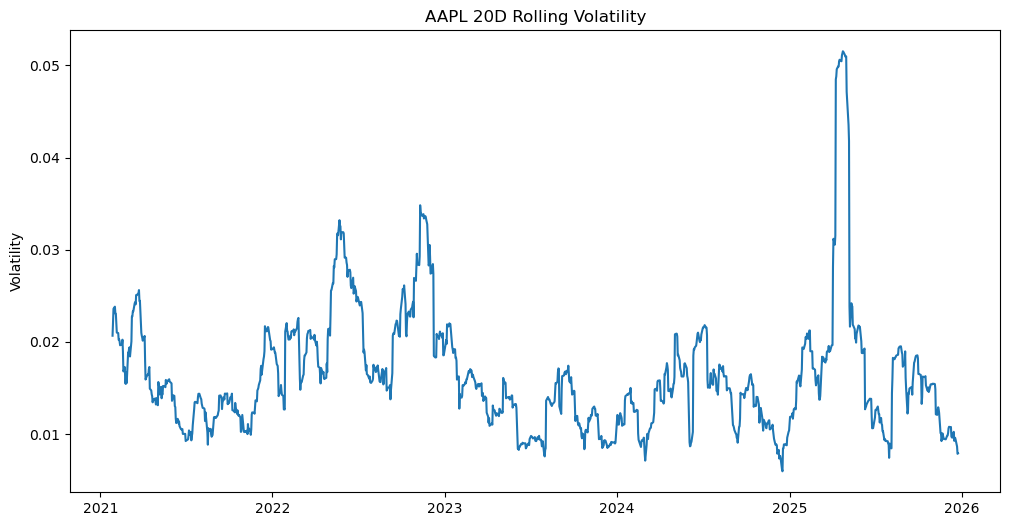

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(vol20["AAPL"])
plt.title("AAPL 20D Rolling Volatility")
plt.ylabel("Volatility")
plt.show()


## Correlation

In [21]:
corr_matrix = returns.corr()
corr_matrix


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Ticker,,,,,
AAPL,1.000000,0.561407,0.578831,0.634483,0.497627
AMZN,0.561407,1.000000,0.619048,0.654817,0.446810
GOOGL,0.578831,0.619048,1.000000,0.644681,0.414842
MSFT,0.634483,0.654817,0.644681,1.000000,0.421038
TSLA,0.497627,0.446810,0.414842,0.421038,1.000000


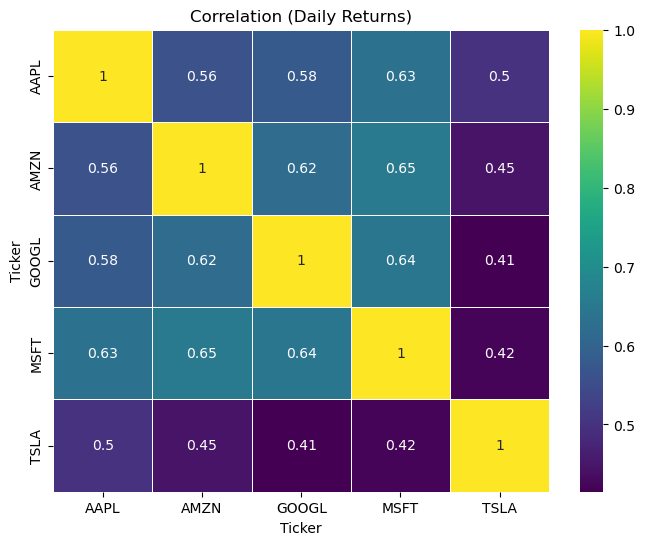

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", linewidths=0.5)
plt.title("Correlation (Daily Returns)")
plt.show()


In [23]:
corr_with_aapl = corr_matrix["AAPL"].sort_values(ascending=False)
corr_with_aapl


Ticker
AAPL     1.000000
MSFT     0.634483
GOOGL    0.578831
AMZN     0.561407
TSLA     0.497627
Name: AAPL, dtype: float64

## Monthly Returns

In [24]:
monthly_prices = adj_close.resample("BME").agg("last")
monthly_prices.head()


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2020-12-31,129.167374,162.846497,86.974838,213.420822,235.223328
2021-01-29,128.456757,160.309998,90.682816,222.574814,264.510010
2021-02-26,118.217224,154.646500,100.337372,223.491425,225.166672
2021-03-31,119.084892,154.703995,102.352654,226.751724,222.643326
2021-04-30,128.161285,173.371002,116.792549,242.534027,236.479996


In [25]:
monthly_returns = monthly_prices.pct_change().dropna()
monthly_returns.head()


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2021-01-29,-0.005502,-0.015576,0.042633,0.042892,0.124506
2021-02-26,-0.079712,-0.035328,0.106465,0.004118,-0.148740
2021-03-31,0.007340,0.000372,0.020085,0.014588,-0.011207
2021-04-30,0.076218,0.120663,0.141080,0.069602,0.062147
2021-05-31,-0.050497,-0.070470,0.001423,-0.007627,-0.118713


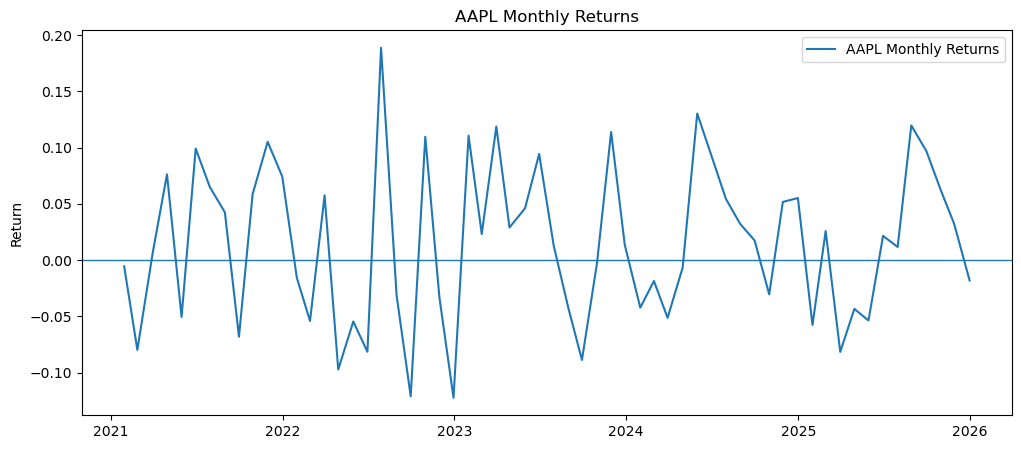

In [26]:
plt.figure(figsize=(12, 5))
plt.plot(monthly_returns["AAPL"], label="AAPL Monthly Returns")
plt.axhline(0, linewidth=1)
plt.title("AAPL Monthly Returns")
plt.ylabel("Return")
plt.legend()
plt.show()


In [27]:
monthly_returns.describe().T


,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,60.0,0.015022,0.070692,-0.122272,-0.042626,0.015525,0.062607,0.188634
AMZN,60.0,0.009832,0.089424,-0.237525,-0.046327,0.014354,0.067160,0.270596
GOOGL,60.0,0.024864,0.080896,-0.179467,-0.029099,0.028541,0.083344,0.156684
MSFT,60.0,0.015865,0.064372,-0.109267,-0.036785,0.011803,0.062635,0.176291
TSLA,60.0,0.026421,0.173326,-0.367334,-0.090317,0.009771,0.125477,0.436530


## Yearly Returns

In [28]:
yearly_prices = adj_close.resample("BYE").agg("last")
yearly_returns = yearly_prices.pct_change().dropna()
yearly_returns.head()


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2021-12-31,0.346482,0.023768,0.652958,0.524769,0.497556
2022-12-30,-0.264042,-0.496152,-0.390896,-0.280248,-0.650315
2023-12-29,0.490080,0.808810,0.583248,0.581913,1.017211
2024-12-31,0.307053,0.443925,0.360056,0.129273,0.625241
2025-12-31,0.098348,0.059210,0.665716,0.166358,0.201961


## Cumulative Returns

In [29]:
cumulative_returns = (1 + returns).cumprod()
cumulative_returns.head()


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2020-12-29,0.986685,1.011584,0.990868,0.996399,1.003466
2020-12-30,0.978272,1.000576,0.978742,0.985420,1.046844
2020-12-31,0.970736,0.991769,0.987982,0.988709,1.063252
2021-01-04,0.946741,0.970362,0.973038,0.967683,1.099565
2021-01-05,0.958446,0.980070,0.980885,0.968617,1.107611


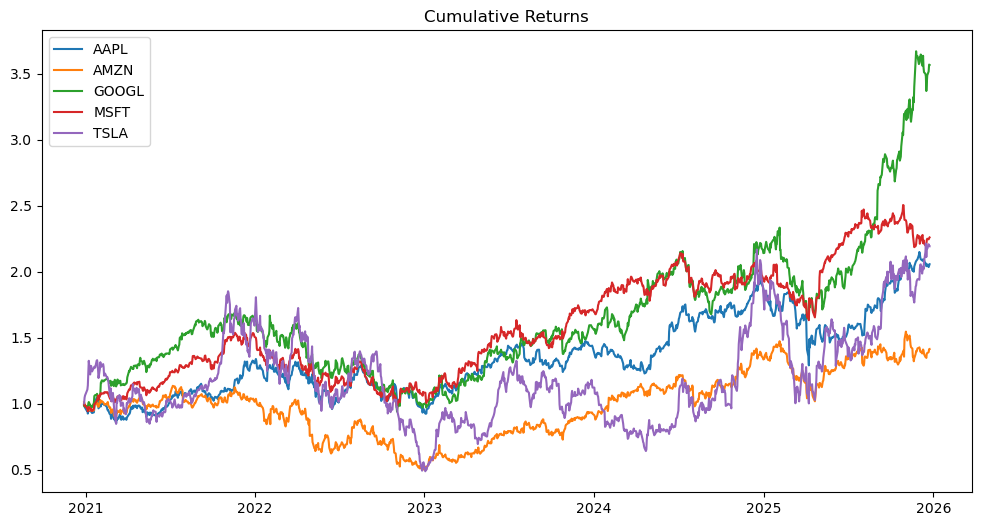

In [30]:
plt.figure(figsize=(12, 6))
for ticker in cumulative_returns.columns:
    plt.plot(cumulative_returns[ticker], label=ticker)

plt.title("Cumulative Returns")
plt.legend()
plt.show()


## Monthly Correlation

In [31]:
monthly_corr = monthly_returns.corr()
monthly_corr


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Ticker,,,,,
AAPL,1.000000,0.555987,0.469492,0.486630,0.528858
AMZN,0.555987,1.000000,0.604759,0.628092,0.591598
GOOGL,0.469492,0.604759,1.000000,0.532486,0.414214
MSFT,0.486630,0.628092,0.532486,1.000000,0.403898
TSLA,0.528858,0.591598,0.414214,0.403898,1.000000


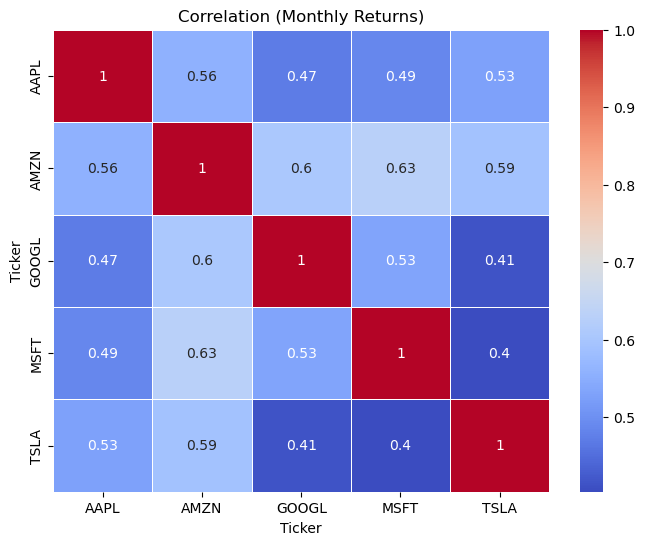

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(monthly_corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation (Monthly Returns)")
plt.show()


## Annualized Metrics

In [33]:
annual_return = returns.mean() * 252
annual_volatility = returns.std() * np.sqrt(252)
sharpe_like = annual_return / annual_volatility

pd.DataFrame({
    "annual_return": annual_return,
    "annual_volatility": annual_volatility,
    "sharpe_like": sharpe_like
}).sort_values("sharpe_like", ascending=False)


,annual_return,annual_volatility,sharpe_like
Ticker,,,
GOOGL,0.304193,0.311648,0.976079
MSFT,0.196998,0.257366,0.765440
AAPL,0.183755,0.278973,0.658683
TSLA,0.341170,0.607549,0.561551
AMZN,0.131401,0.351277,0.374067


## Fundamentals

In [34]:
ticker = "AAPL"
info = yf.Ticker(ticker).info
type(info), list(info.keys())[:15]


(dict,
 ['address1',
  'city',
  'state',
  'zip',
  'country',
  'phone',
  'website',
  'industry',
  'industryKey',
  'industryDisp',
  'sector',
  'sectorKey',
  'sectorDisp',
  'longBusinessSummary',
  'fullTimeEmployees'])

In [35]:
fundamentals = []

for ticker in adj_close.columns:
    info = yf.Ticker(ticker).info
    row = {
        "ticker": ticker,
        "marketCap": info.get("marketCap"),
        "trailingPE": info.get("trailingPE"),
        "forwardPE": info.get("forwardPE"),
        "priceToBook": info.get("priceToBook"),
        "dividendYield": info.get("dividendYield"),
        "profitMargins": info.get("profitMargins"),
        "returnOnEquity": info.get("returnOnEquity"),
        "totalRevenue": info.get("totalRevenue"),
        "totalDebt": info.get("totalDebt"),
        "beta": info.get("beta"),
        "sector": info.get("sector"),
        "industry": info.get("industry"),
    }
    fundamentals.append(row)

fundamentals_df = pd.DataFrame(fundamentals)
fundamentals_df


,ticker,marketCap,trailingPE,forwardPE,priceToBook,dividendYield,profitMargins,returnOnEquity,totalRevenue,totalDebt,beta,sector,industry
0,AAPL,4063446958080,36.75302,29.907986,54.860750,0.38,0.26915,1.71422,416161005568,112377004032,1.107,Technology,Consumer Electronics
1,AMZN,2484192411648,32.77574,29.621190,6.718709,NaN,0.11063,0.24327,691330023424,160437993472,1.372,Consumer Cyclical,Internet Retail
2,GOOGL,3804296380416,31.06726,28.035013,9.805201,0.27,0.32233,0.35450,385476001792,44195000320,1.070,Communication Services,Internet Content & Information
3,MSFT,3627533729792,34.73452,26.038315,9.992219,0.75,0.35707,0.32241,293812011008,120375001088,1.070,Technology,Software - Infrastructure
4,TSLA,1614352613376,332.46573,219.803120,20.176240,NaN,0.05314,0.06791,95632998400,13788000256,1.878,Consumer Cyclical,Auto Manufacturers


## Clean Fundamentals

In [36]:
fundamentals_df.info()
fundamentals_df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ticker          5 non-null      object 
 1   marketCap       5 non-null      int64  
 2   trailingPE      5 non-null      float64
 3   forwardPE       5 non-null      float64
 4   priceToBook     5 non-null      float64
 5   dividendYield   3 non-null      float64
 6   profitMargins   5 non-null      float64
 7   returnOnEquity  5 non-null      float64
 8   totalRevenue    5 non-null      int64  
 9   totalDebt       5 non-null      int64  
 10  beta            5 non-null      float64
 11  sector          5 non-null      object 
 12  industry        5 non-null      object 
dtypes: float64(7), int64(3), object(3)
memory usage: 652.0+ bytes


ticker            0
marketCap         0
trailingPE        0
forwardPE         0
priceToBook       0
dividendYield     2
profitMargins     0
returnOnEquity    0
totalRevenue      0
totalDebt         0
beta              0
sector            0
industry          0
dtype: int64

In [37]:
numeric_cols = [
    "marketCap", "trailingPE", "forwardPE", "priceToBook", "dividendYield",
    "profitMargins", "returnOnEquity", "totalRevenue", "totalDebt", "beta"
]

fundamentals_df[numeric_cols] = fundamentals_df[numeric_cols].apply(pd.to_numeric, errors="coerce")
fundamentals_df["dividendYield"] = fundamentals_df["dividendYield"].fillna(0)

fundamentals_df.isna().sum()


ticker            0
marketCap         0
trailingPE        0
forwardPE         0
priceToBook       0
dividendYield     0
profitMargins     0
returnOnEquity    0
totalRevenue      0
totalDebt         0
beta              0
sector            0
industry          0
dtype: int64

## Price Metrics

In [38]:
price_metrics_df = pd.DataFrame({
    "ticker": returns.columns,
    "annual_return": annual_return.values,
    "annual_volatility": annual_volatility.values,
    "sharpe_like": sharpe_like.values
})
price_metrics_df


,ticker,annual_return,annual_volatility,sharpe_like
0,AAPL,0.183755,0.278973,0.658683
1,AMZN,0.131401,0.351277,0.374067
2,GOOGL,0.304193,0.311648,0.976079
3,MSFT,0.196998,0.257366,0.765440
4,TSLA,0.341170,0.607549,0.561551


In [39]:
price_metrics_df.info()
price_metrics_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ticker             5 non-null      object 
 1   annual_return      5 non-null      float64
 2   annual_volatility  5 non-null      float64
 3   sharpe_like        5 non-null      float64
dtypes: float64(3), object(1)
memory usage: 292.0+ bytes


,annual_return,annual_volatility,sharpe_like
count,5.000000,5.000000,5.000000
mean,0.231503,0.361363,0.667164
std,0.087752,0.142113,0.224844
min,0.131401,0.257366,0.374067
25%,0.183755,0.278973,0.561551
50%,0.196998,0.311648,0.658683
75%,0.304193,0.351277,0.765440
max,0.341170,0.607549,0.976079


## Merge

In [40]:
fundamentals_df["ticker"].tolist(), price_metrics_df["ticker"].tolist()


(['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'TSLA'],
 ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'TSLA'])

In [41]:
final_df = fundamentals_df.merge(price_metrics_df, on="ticker", how="inner")
final_df


,ticker,marketCap,trailingPE,forwardPE,priceToBook,dividendYield,profitMargins,returnOnEquity,totalRevenue,totalDebt,beta,sector,industry,annual_return,annual_volatility,sharpe_like
0,AAPL,4063446958080,36.75302,29.907986,54.860750,0.38,0.26915,1.71422,416161005568,112377004032,1.107,Technology,Consumer Electronics,0.183755,0.278973,0.658683
1,AMZN,2484192411648,32.77574,29.621190,6.718709,0.00,0.11063,0.24327,691330023424,160437993472,1.372,Consumer Cyclical,Internet Retail,0.131401,0.351277,0.374067
2,GOOGL,3804296380416,31.06726,28.035013,9.805201,0.27,0.32233,0.35450,385476001792,44195000320,1.070,Communication Services,Internet Content & Information,0.304193,0.311648,0.976079
3,MSFT,3627533729792,34.73452,26.038315,9.992219,0.75,0.35707,0.32241,293812011008,120375001088,1.070,Technology,Software - Infrastructure,0.196998,0.257366,0.765440
4,TSLA,1614352613376,332.46573,219.803120,20.176240,0.00,0.05314,0.06791,95632998400,13788000256,1.878,Consumer Cyclical,Auto Manufacturers,0.341170,0.607549,0.561551


In [42]:
final_df.shape
final_df.info()
final_df.isna().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ticker             5 non-null      object 
 1   marketCap          5 non-null      int64  
 2   trailingPE         5 non-null      float64
 3   forwardPE          5 non-null      float64
 4   priceToBook        5 non-null      float64
 5   dividendYield      5 non-null      float64
 6   profitMargins      5 non-null      float64
 7   returnOnEquity     5 non-null      float64
 8   totalRevenue       5 non-null      int64  
 9   totalDebt          5 non-null      int64  
 10  beta               5 non-null      float64
 11  sector             5 non-null      object 
 12  industry           5 non-null      object 
 13  annual_return      5 non-null      float64
 14  annual_volatility  5 non-null      float64
 15  sharpe_like        5 non-null      float64
dtypes: float64(10), int64(3), obje

ticker               0
marketCap            0
trailingPE           0
forwardPE            0
priceToBook          0
dividendYield        0
profitMargins        0
returnOnEquity       0
totalRevenue         0
totalDebt            0
beta                 0
sector               0
industry             0
annual_return        0
annual_volatility    0
sharpe_like          0
dtype: int64

## Scaling

In [43]:
scale_cols = [
    "trailingPE",
    "forwardPE",
    "priceToBook",
    "profitMargins",
    "returnOnEquity",
    "beta",
    "annual_return",
    "annual_volatility",
    "sharpe_like"
]

scaled_df = final_df.copy()
scaled_df[scale_cols] = (scaled_df[scale_cols] - scaled_df[scale_cols].mean()) / scaled_df[scale_cols].std()

invert_cols = ["trailingPE", "forwardPE", "priceToBook", "beta", "annual_volatility"]
scaled_df[invert_cols] = -scaled_df[invert_cols]

scaled_df["composite_score"] = scaled_df[scale_cols].mean(axis=1)

ranking = scaled_df[["ticker", "composite_score"]].sort_values("composite_score", ascending=False)
ranking


,ticker,composite_score
2,GOOGL,0.569535
3,MSFT,0.394178
0,AAPL,0.198871
1,AMZN,-0.255246
4,TSLA,-0.907339


In [44]:
scaled_df[scale_cols + ["composite_score"]].describe().T


,count,mean,std,min,25%,50%,75%,max
trailingPE,5.0,4.440892e-17,1.000000,-1.788627,0.425293,0.440405,0.455070,0.467860
forwardPE,5.0,-8.881784e-17,1.000000,-1.788565,0.429534,0.432884,0.451412,0.474735
priceToBook,5.0,4.336809e-17,1.000000,-1.730048,0.006729,0.516679,0.526044,0.680596
profitMargins,5.0,0.000000e+00,1.000000,-1.266923,-0.836769,0.349316,0.747222,1.007155
returnOnEquity,5.0,2.220446e-17,1.000000,-0.710090,-0.446582,-0.327660,-0.279440,1.763771
beta,5.0,2.220446e-16,1.000000,-1.666261,-0.209075,0.554076,0.660629,0.660629
annual_return,5.0,8.881784e-17,1.000000,-1.140742,-0.544134,-0.393214,0.828355,1.249735
annual_volatility,5.0,0.000000e+00,1.000000,-1.732329,0.070967,0.349825,0.579748,0.731788
sharpe_like,5.0,2.664535e-16,1.000000,-1.303560,-0.469717,-0.037720,0.437086,1.373911
composite_score,5.0,6.661338e-17,0.593235,-0.907339,-0.255246,0.198871,0.394178,0.569535


## Results

In [45]:
cols_to_show = [
    "ticker", "sector", "industry",
    "composite_score",
    "annual_return", "annual_volatility", "sharpe_like",
    "trailingPE", "forwardPE", "priceToBook",
    "profitMargins", "returnOnEquity", "dividendYield"
]

scaled_df[cols_to_show].sort_values("composite_score", ascending=False)


,ticker,sector,industry,composite_score,annual_return,annual_volatility,sharpe_like,trailingPE,forwardPE,priceToBook,profitMargins,returnOnEquity,dividendYield
2,GOOGL,Communication Services,Internet Content & Information,0.569535,0.828355,0.349825,1.373911,0.467860,0.451412,0.526044,0.747222,-0.279440,0.27
3,MSFT,Technology,Software - Infrastructure,0.394178,-0.393214,0.731788,0.437086,0.440405,0.474735,0.516679,1.007155,-0.327660,0.75
0,AAPL,Technology,Consumer Electronics,0.198871,-0.544134,0.579748,-0.037720,0.425293,0.429534,-1.730048,0.349316,1.763771,0.38
1,AMZN,Consumer Cyclical,Internet Retail,-0.255246,-1.140742,0.070967,-1.303560,0.455070,0.432884,0.680596,-0.836769,-0.446582,0.00
4,TSLA,Consumer Cyclical,Auto Manufacturers,-0.907339,1.249735,-1.732329,-0.469717,-1.788627,-1.788565,0.006729,-1.266923,-0.710090,0.00


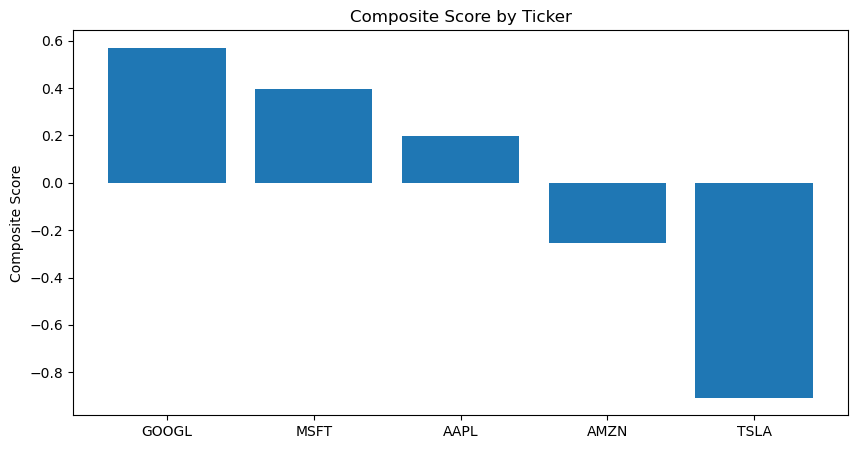

In [46]:
ranked = scaled_df.sort_values("composite_score", ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(ranked["ticker"], ranked["composite_score"])
plt.title("Composite Score by Ticker")
plt.ylabel("Composite Score")
plt.show()


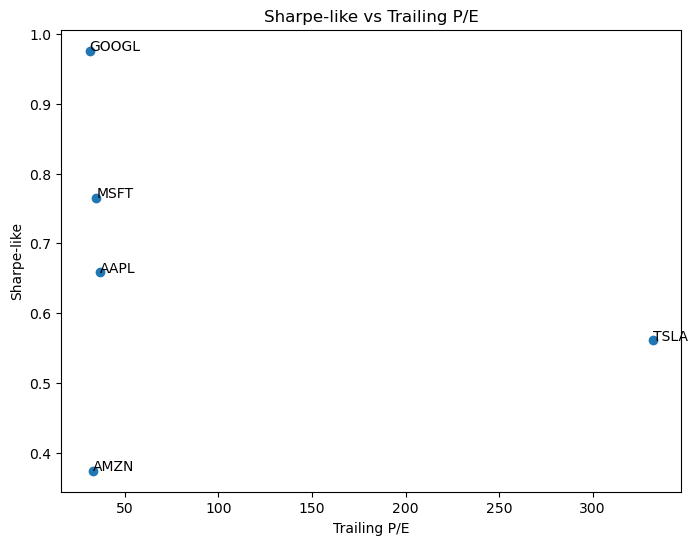

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df["trailingPE"], final_df["sharpe_like"])

for _, row in final_df.iterrows():
    plt.text(row["trailingPE"], row["sharpe_like"], row["ticker"])

plt.title("Sharpe-like vs Trailing P/E")
plt.xlabel("Trailing P/E")
plt.ylabel("Sharpe-like")
plt.show()
